<a href="https://colab.research.google.com/github/joekakone/Prepare-Google-Tensorflow-Certificate/blob/master/1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Build and train neural network models using TensorFlow 2.x
- **1.1: Linear regression (Football players values)** [[Notebook]](1_1.ipynb)
- 1.2: Iris flowers classification [[Notebook]](1_2.ipynb)

## Packages

In [1]:
import math

import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.9.2'

## Config

In [3]:
n_samples = 1000
n_features = 8
test_size = .3
learning_rate = 0.01
n_epochs = 30
batch_size = 48

## Get data

In [4]:
 X, y = make_regression(n_samples=n_samples, n_features=n_features)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

## Design model

In [6]:
# model = keras.Sequential([keras.layers.Dense(units=1, input_shape=(n_features,))])
model = keras.Sequential()
model.add(keras.layers.Dense(units=1, input_shape=(n_features,)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


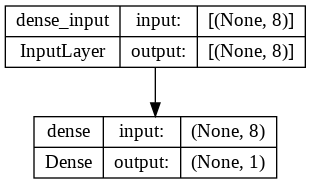

In [7]:
keras.utils.plot_model(model=model, show_shapes=True)

## Train model

In [8]:
# model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['root_mean_squared_error'])
# keras.backend.set_value(model.optimizer.lr, learning_rate)
model.compile(
    loss=keras.losses.MeanSquaredError(), 
    optimizer=keras.optimizers.SGD(learning_rate=learning_rate), 
    metrics=[keras.metrics.RootMeanSquaredError()]
)

In [9]:
steps_per_epoch = math.ceil(len(X_train) / 48)

history = model.fit(X_train, y_train, validation_data=[X_test, y_test], epochs=n_epochs, steps_per_epoch=steps_per_epoch)

Epoch 1/30
15/15 [==============================] - 1s 15ms/step - loss: 12542.7461 - root_mean_squared_error: 111.9944 - val_loss: 9378.7305 - val_root_mean_squared_error: 96.8438
Epoch 2/30
15/15 [==============================] - 0s 4ms/step - loss: 6745.5522 - root_mean_squared_error: 82.1313 - val_loss: 5089.3843 - val_root_mean_squared_error: 71.3399
Epoch 3/30
15/15 [==============================] - 0s 4ms/step - loss: 3639.7239 - root_mean_squared_error: 60.3301 - val_loss: 2766.3040 - val_root_mean_squared_error: 52.5957
Epoch 4/30
15/15 [==============================] - 0s 4ms/step - loss: 1968.6736 - root_mean_squared_error: 44.3697 - val_loss: 1507.0908 - val_root_mean_squared_error: 38.8213
Epoch 5/30
15/15 [==============================] - 0s 4ms/step - loss: 1067.6790 - root_mean_squared_error: 32.6754 - val_loss: 824.0579 - val_root_mean_squared_error: 28.7064
Epoch 6/30
15/15 [==============================] - 0s 4ms/step - loss: 581.0303 - root_mean_squared_error: 

## Training Reporting

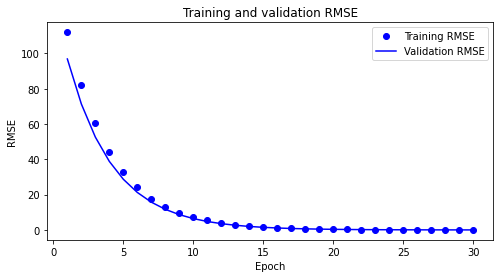

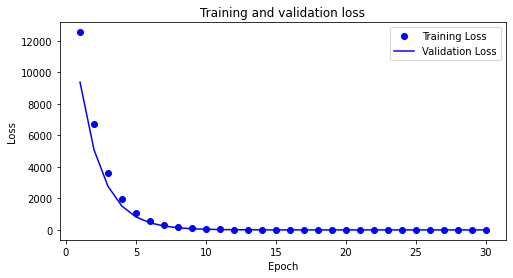

In [10]:
root_mean_squared_error = history.history['root_mean_squared_error']
loss = history.history['loss']
val_root_mean_squared_error = history.history['val_root_mean_squared_error']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(8, 4))
plt.plot(epochs, root_mean_squared_error, 'bo', label='Training RMSE')
plt.plot(epochs, val_root_mean_squared_error, 'b', label='Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Training and validation RMSE')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend(loc='best')
plt.show()

## Save model

In [11]:
model_path = 'model_1_1.h5'
model.save(filepath=model_path)